In [1]:
import pickle
from jupyter_utils import jupyter_setup
jupyter_setup()
import numpy as np
import pandas as pd
from audio_processing import FeatureSet
import matplotlib.pyplot as plt
import librosa
import ipywidgets as widgets
import os
dataset_basepath = "data/Coswara_processed/pickles/"
from participant import Participant
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

C:\Michi\acoustic_covid_detection\python


In [2]:
dataset_list = os.listdir(dataset_basepath)

In [3]:
dataset_list = [path for path in dataset_list if "logmel_combined" in path]
dataset_list = [path for path in dataset_list if "augmented" not in path]

In [4]:
def load_dataset(path):
    dataset_basepath = "data/Coswara_processed/pickles/"
    fullpath = os.path.join(dataset_basepath, path)
    print(fullpath)
    with open(fullpath, "rb") as f:
        return pickle.load(f)
dropdown = widgets.Dropdown(options=dataset_list)
display(dropdown)

Dropdown(options=('2023_02_25_logmel_combined_coughs_3s.pickle', '2023_05_02_logmel_combined_breaths_NEW_23msH…

In [156]:
dataset = load_dataset(dropdown.value)
print(dataset)

data/Coswara_processed/pickles/2023_07_08_logmel_combined_coughs_11msHop_23msFFT_fmax11000_224logmel_EXTENDED.pickle

Feature Set - #Participants: 2391
----------------------------------------------------
type_of_features:    logmel
n_time_steps:        224
n_features:          224
sample_rate:         22050
n_fft:               8192
window_length:       512
hop_size:            256
fmin:                0
fmax:                11025
hop_size_ms:         11.61
window_length_ms:    23.22
duration_seconds:    2.6
fft_res_hz:          2.69
-------------------Augmentations--------------------
----------------------------------------------------


In [157]:
rec_type = list(dataset.participants[0].recordings.keys())[0]
rec_type

'combined_coughs'

In [158]:
means_f = np.array([part.recordings[rec_type].features.mean(axis=1) for part in dataset.participants])
stds_f = np.array([part.recordings[rec_type].features.std(axis=1) for part in dataset.participants])

In [159]:
overall_mean_f = means_f.mean(axis=0)
overall_std_f = stds_f.mean(axis=0)

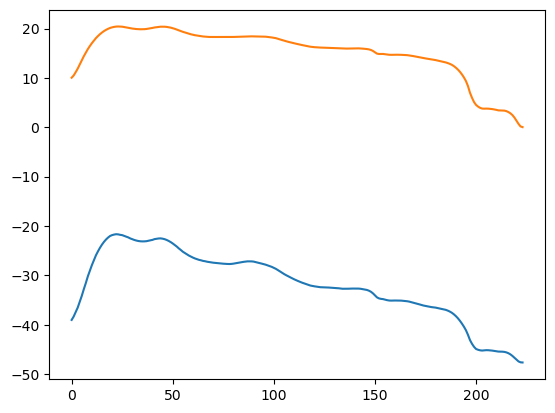

In [160]:
plt.plot(overall_mean_f)
plt.plot(overall_std_f)

In [161]:
overall_mean_f.mean(), overall_std_f.mean()

(-31.89236, 15.1989355)

# Save the frequency wise statistics for every rec type

In [92]:
combined_stats = np.stack([overall_mean_f, overall_std_f])

In [93]:
save_path = f"data/Coswara_processed/feature_statistics/{rec_type}_stats.npy"
save_path

'data/Coswara_processed/feature_statistics/combined_coughs_stats.npy'

In [94]:
np.save(save_path, combined_stats)

In [95]:
loaded_stats = np.load(save_path)

In [96]:
loaded_stats[:, :3]

array([[-38.525517 , -37.817047 , -36.89317  ],
       [ 10.173527 ,  10.6383705,  11.328411 ]], dtype=float32)

In [97]:
means = loaded_stats[0,:]
stds = loaded_stats[1,:]

In [67]:
means[:3], stds[:3]

(array([-27.872335, -28.556498, -28.488213], dtype=float32),
 array([7.0122695, 7.0219526, 7.2038035], dtype=float32))

# general statistics

In [162]:
means = [part.recordings[rec_type].features.mean() for part in dataset.participants]
stds = [part.recordings[rec_type].features.std() for part in dataset.participants]

means = np.array(means).mean()
stds = np.array(stds).mean()
means, stds

(-31.892363, 18.19392)

In [163]:
general_save_path = f"data/Coswara_processed/feature_statistics/{rec_type}_general_stats.npy"
general_save_path

'data/Coswara_processed/feature_statistics/combined_coughs_general_stats.npy'

In [164]:
combined_general_stats = np.array([means, stds])

In [165]:
np.save(general_save_path, combined_general_stats)

In [166]:
np.load(general_save_path)

array([-31.892363,  18.19392 ], dtype=float32)